# Vehicle Price Factors


This project will analyse the data collected by Crankshaft List to determine which factors influence the price of a vehicle.

### Table of contents:

- [Data Preprocessing](#Data)

    
    Here the data will be checked and altered if necessary in order to prepare for the data analysis.


- [Exploratory Data Analysis](#Ana)
   
       Here the different variables will be analysed against price using histograms, correlation coefficients and other
       data analysis techniques.
    
    
- [Final conclusion](#Final)
    
        This is the final conclusion that will assess which variabkes had the most influence on the price of a vehicle.

### Data Preprocessing <a class="anchor" id="Data"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
try:
    vehicles = pd.read_csv('/datasets/vehicles_us.csv')
except:
    vehicles = pd.read_csv('vehicles_us_.csv')

display(vehicles)


display(vehicles.describe())
vehicles.info()
duplicates =  vehicles[vehicles.duplicated()]
print(duplicates)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


## Conclusion

First the the general information about the dataset needs to be checked. Used the display() method to get the general layout of the dataset and used describe() to get the description of the values in the dataset. Here unusual values in the dataset such as a price of 1 can be identified. The info() method was also called to see the data type of each column, so it can be changed to an appropriate one during the data reprocessing process, for example in the is_4wd column, this should be an object rather than a float. Finally, I used the duplicated() method to identify any duplicates, which there were none.

In [2]:

num_var = vehicles.columns[vehicles.dtypes != 'object']
cat_var = vehicles.columns[vehicles.dtypes == 'object']

print('Missing values in interger columns:\n',vehicles[num_var].isnull().sum())
print('Missing values in object columns:\n',vehicles[cat_var].isnull().sum())

odemeter_avg = vehicles.groupby(['model_year','condition'])['odometer'].transform('median')
vehicles['odometer'] = vehicles['odometer'].fillna(odemeter_avg)

vehicles['odometer'] = vehicles['odometer'].fillna(vehicles.groupby(['model','model_year'])['odometer'].transform('median'))

model_year_avg = vehicles.groupby(['model','odometer'])['model_year'].transform('median')
vehicles['model_year'] = vehicles['model_year'].fillna(model_year_avg)

cylinder_avg = vehicles.groupby(['model','type'])['cylinders'].transform('median')
vehicles['cylinders'] = vehicles['cylinders'].fillna(cylinder_avg)

is_4wd_avg = vehicles.groupby(['model','type'])['is_4wd'].transform('median')
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(is_4wd_avg)
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)
vehicles.info()

def change_type(column,tipe):
    try:
        vehicles[column] = vehicles[column].astype(tipe)
    except:
        vehicles[column] = pd.to_numeric(vehicles[column].round(), errors='coerce').astype(tipe)

change_type('is_4wd', object)
vehicles.info()

Missing values in interger columns:
 price              0
model_year      3619
cylinders       5260
odometer        7892
is_4wd         25953
days_listed        0
dtype: int64
Missing values in object columns:
 model              0
condition          0
fuel               0
transmission       0
type               0
paint_color     9267
date_posted        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      49460 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51510 non-null float64
fuel            51525 non-null object
odometer        50973 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int6

## Conclusion

The info() method was called to identify missing values in the dataset. Then the groupby method was used to get an average value of rows that have similar values in certain variables. The value obtained from this was used in the fillna() method to fill in the missing values. With the is_4wd column, as it is a boolean, the values that were not 1 after the fillna() method could be changed to 0 instead. Lastly, as said prior, is_4wd column should be an object rather than a float. Therefore I changed it using the astype() method.

In [3]:

vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d')
years = vehicles['date_posted'].dt.strftime('%Y').astype(np.int64)
difference = years - vehicles['model_year']
vehicles['vehicle_age'] = difference

mileage = vehicles.groupby(['model','condition'])['odometer'].transform('median')
per_year = mileage / 365
vehicles['mileage_per_year'] = pd.to_numeric(per_year.round(), errors='coerce').astype('Int64')

vehicles['date_posted'] = vehicles['date_posted'].dt.strftime('%d-%m-%Y')

def car_condition(cond):
    if 'like new' in cond:
        assign = 4
    elif 'new' in cond:
        assign = 5
    elif 'excellent'in cond:
        assign = 3
    elif 'good' in cond:
        assign = 2
    elif 'fair' in cond:
        assign = 1
    else:
        assign = 0
    return assign
vehicles['condition'] = vehicles['condition'].apply(car_condition)
vehicles

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,1,23-06-2018,19,7.0,373
1,25500,2014.0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1,19-10-2018,50,4.0,395
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,1,07-02-2019,79,6.0,195
3,1500,2003.0,ford f-150,1,8.0,gas,193850.0,automatic,pickup,NaN,1,22-03-2019,9,16.0,540
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,1,02-04-2019,28,2.0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,1,03-10-2018,37,5.0,138
51521,2700,2002.0,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,1,14-11-2018,22,16.0,435
51522,3950,2009.0,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,1,15-11-2018,32,9.0,268
51523,7455,2013.0,toyota corolla,2,4.0,gas,139573.0,automatic,sedan,black,1,02-07-2018,71,5.0,357


## Conclusion
To find the vehicles age at time of the lisitng, this firstly required turning the date_posted column into the time-date format. Then using strftime() extract the year from the date. Then find the difference between the model year and year of date posted to find out the vehicles age in years. Then I found the mileage per year by dividing the odometer by 365 to see the average mileage usage over a year. I changed the date_posted into the correct time-date format requested and then used a function of if statements to change the phrases in the condition column into numeric values.

### Exploratory Data Analysis <a class="anchor" id="Ana"></a>

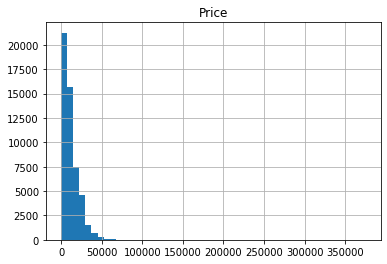

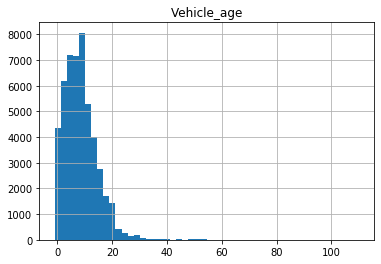

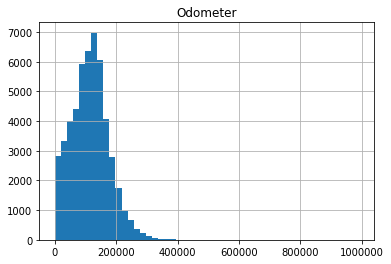

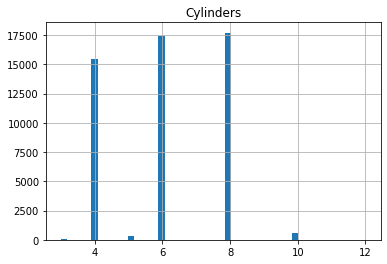

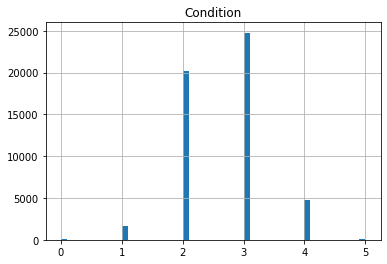

In [4]:

def histo_gram(variable):
    vehicles[variable].hist(bins=50)
    plt.title(variable.capitalize())
    plt.show()
histo_gram('price')
histo_gram('vehicle_age')
histo_gram('odometer')
histo_gram('cylinders')
histo_gram('condition')


## Conclusion
For price, most of histogram lies above 2500 or even 5000, but peaks at over 20,000 but median is around 9k. High value outliers. For vehicle age, when ad was placed most vehicles between 10 and 20 years old. There is a long thin right tail with ages that pass 20. In the mileage histogram, the peak is inline with the median value, however long left tail below 1000. In the cylinders histogram, 4,6,8 most popular. Outliers in other values, that do not add much to the data. The condition histogram has outliers at 0 and 5. Not much to add to data as most of the data lies between 1-4

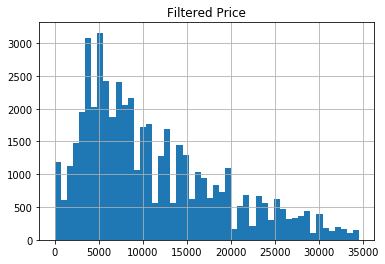

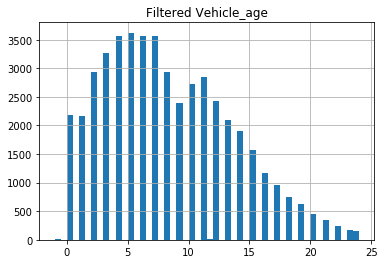

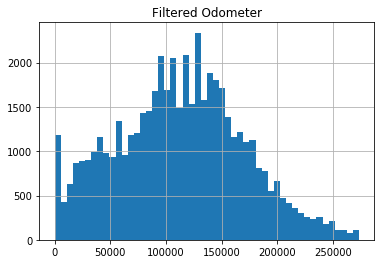

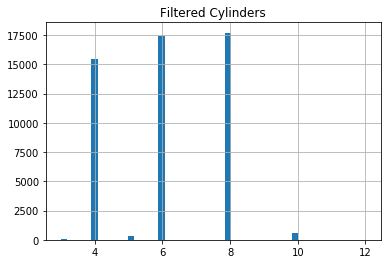

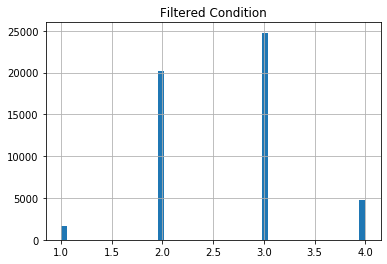

In [5]:

vehicles.describe()
def filt(data):
    h = data
    Q1= vehicles[data].quantile(0.25)
    Q3 = vehicles[data].quantile(0.75)
    IQR = Q3- Q1
    return IQR,Q3,Q1
IQR1,Q31,Q11=filt('price')
IQR2,Q32,Q12=filt('vehicle_age')
IQR3,Q33,Q13=filt('odometer')
IQR4,Q34,Q14=filt('cylinders')
IQR5,Q35,Q15=filt('condition')
filteredp = vehicles.query('(@Q11 - 1.5 * @IQR1) <= price <= (@Q31 + 1.5 * @IQR1)')
filteredv = vehicles.query('(@Q12 - 1.5 * @IQR2) <= vehicle_age <= (@Q32 + 1.5 * @IQR2)')
filteredo = vehicles.query('(@Q13 - 1.5 * @IQR3) <= odometer <= (@Q33 + 1.5 * @IQR3)')
filteredc = vehicles.query('(@Q14 - 1.5 * @IQR4) <= cylinders <= (@Q34 + 1.5 * @IQR4)')
filteredco = vehicles.query('(@Q15 - 1.5 * @IQR5) <= condition <= (@Q35 + 1.5 * @IQR5)')
def histo_grams(variable,types):
    variable.hist(types,bins=50)
    plt.title('Filtered ' + types.capitalize())
    plt.show()
histo_grams(filteredp,'price')
histo_grams(filteredv, 'vehicle_age')
histo_grams(filteredo,'odometer')
histo_grams(filteredc,'cylinders')
histo_grams(filteredco,'condition')



## Conclusion

For the filtered price histogram, it has gotten rid of the peak values of over 20,000 and is closer to the median value of 9,000. Also the price is no longer as small as 1, it is larger than that. As identified in the previous histogram, there was a long right tail for ages past 20. The filtered age has removed this, no ages above 25. For filtered mileage, compared to previous histogram, peak more inline with the median values. No longer is there right tail. The filtered cylinders histogram has not changed compared to previous, suggesting that it is inline with the IQR. However with the filtered condition histogram, the values 0 and 5 have been removed, as they were outside the IQR range. This makes sense as they contained a small amount of data.

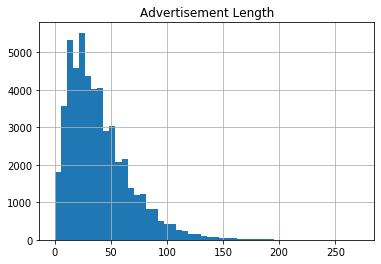

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

Ads that were removed quickly:


,price,model_year,condition,cylinders,odometer,days_listed,vehicle_age,mileage_per_year
price,1.000000,0.450903,0.252145,0.311062,-0.442312,-0.009675,-0.448929,-0.298090
model_year,0.450903,1.000000,0.286317,-0.150927,-0.494190,-0.005774,-0.997313,-0.387845
condition,0.252145,0.286317,1.000000,-0.064839,-0.315522,-0.004820,-0.284724,-0.634484
cylinders,0.311062,-0.150927,-0.064839,1.000000,0.085127,-0.006299,0.150697,0.142008
odometer,-0.442312,-0.494190,-0.315522,0.085127,1.000000,-0.003985,0.493408,0.480505
days_listed,-0.009675,-0.005774,-0.004820,-0.006299,-0.003985,1.000000,0.006078,0.000318
vehicle_age,-0.448929,-0.997313,-0.284724,0.150697,0.493408,0.006078,1.000000,0.387202
mileage_per_year,-0.298090,-0.387845,-0.634484,0.142008,0.480505,0.000318,0.387202,1.000000



Ads that were listed for abnormally long:


,price,model_year,condition,cylinders,odometer,days_listed,vehicle_age,mileage_per_year
price,1.000000,0.413953,0.212575,0.307001,-0.434222,-0.006211,-0.412946,-0.261687
model_year,0.413953,1.000000,0.271506,-0.146915,-0.490149,-0.001961,-0.997305,-0.378452
condition,0.212575,0.271506,1.000000,-0.063042,-0.312532,-0.001414,-0.271289,-0.623773
cylinders,0.307001,-0.146915,-0.063042,1.000000,0.097126,-0.004006,0.147575,0.152661
odometer,-0.434222,-0.490149,-0.312532,0.097126,1.000000,0.009402,0.489048,0.492730
days_listed,-0.006211,-0.001961,-0.001414,-0.004006,0.009402,1.000000,0.003008,0.003082
vehicle_age,-0.412946,-0.997305,-0.271289,0.147575,0.489048,0.003008,1.000000,0.377734
mileage_per_year,-0.261687,-0.378452,-0.623773,0.152661,0.492730,0.003082,0.377734,1.000000


In [6]:

vehicles['days_listed'].hist(bins=50)
plt.title('Advertisement Length')
plt.show()

display(vehicles['days_listed'].describe())

quick = vehicles['days_listed'].quantile(0.25)
slow = vehicles['days_listed'].quantile(0.75)
snail = vehicles.query('days_listed > @slow').sort_values('days_listed',ascending=False)
fast = vehicles.query('days_listed < @quick').sort_values('days_listed',ascending=False)
print('Ads that were removed quickly:')
display(fast.corr())
print('\nAds that were listed for abnormally long:')
display(snail.corr())


## Conclusion
Life cycle of most adds was just over a month at 33 days, using the median, which is consistent with the peak of the histogram. However large variation of days. Looking at the correlations of fast removing ads and abnormally long ads, ads are removed quickly when it is a new car, in good condition with a low mileage. Typically, the car is a more expensive, the price decreases as the days it has been listed increases. They were listed for an abnormally long time when the mileage value was high, as there is positive correlation between the two. Also, the price would be lower and the model year alot older than fast removing ads. The condition is also worse.


         price      ads
price  1.00000 -0.03087
ads   -0.03087  1.00000


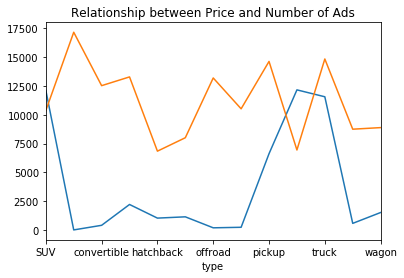

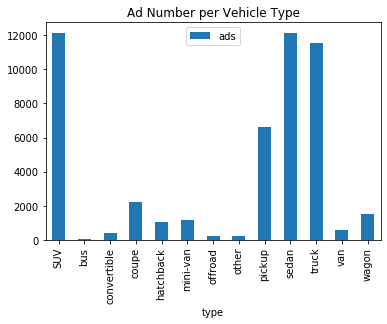

In [7]:

models = filteredp['type'].value_counts()
table= filteredp.pivot_table(index='type',values='price')
ad_price = table.join(models)
ad_price = ad_price.rename(columns={'type' : 'ads'})
ad_price.sort_values('price',ascending=False)
print(ad_price.corr())
ad_price.ads.plot()
ad_price.price.plot()
plt.title('Relationship between Price and Number of Ads')
plt.show()

ad_price.plot(y='ads',kind='bar')
plt.title('Ad Number per Vehicle Type')
plt.show()


## Conclusion
Typically, as shown in the first graph, as the number of ads increase, the price of the vehicle decreases. This is confirmed by the negative correlation of the price and ads of -0.03 . SUV, sedans and trucks have the greatest number of ads according the the last graph.

Checking there is at least 50 ads for SUV :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12405 entries, 0 to 51516
Data columns (total 15 columns):
price               12405 non-null int64
model_year          11863 non-null float64
model               12405 non-null object
condition           12405 non-null int64
cylinders           12404 non-null float64
fuel                12405 non-null object
odometer            12272 non-null float64
transmission        12405 non-null object
type                12405 non-null object
paint_color         10169 non-null object
is_4wd              12405 non-null object
date_posted         12405 non-null object
days_listed         12405 non-null int64
vehicle_age         11863 non-null float64
mileage_per_year    12404 non-null Int64
dtypes: Int64(1), float64(4), int64(3), object(7)
memory usage: 1.5+ MB


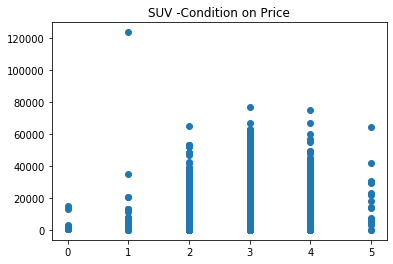

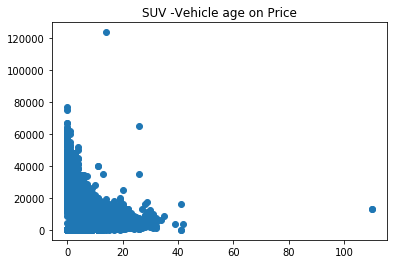

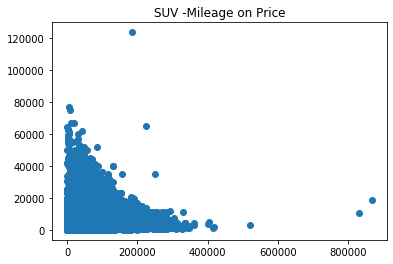

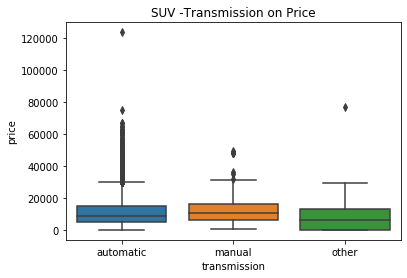

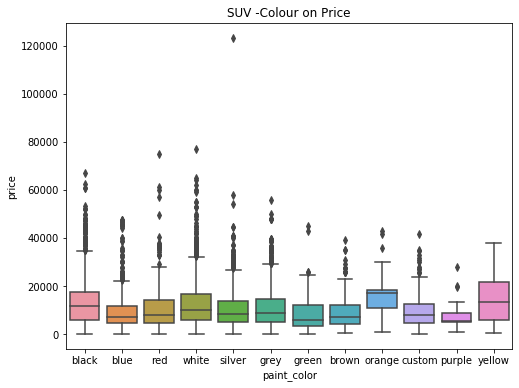

Checking there is at least 50 ads for sedan :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12154 entries, 2 to 51524
Data columns (total 15 columns):
price               12154 non-null int64
model_year          11642 non-null float64
model               12154 non-null object
condition           12154 non-null int64
cylinders           12151 non-null float64
fuel                12154 non-null object
odometer            12024 non-null float64
transmission        12154 non-null object
type                12154 non-null object
paint_color         9965 non-null object
is_4wd              12154 non-null object
date_posted         12154 non-null object
days_listed         12154 non-null int64
vehicle_age         11642 non-null float64
mileage_per_year    12154 non-null Int64
dtypes: Int64(1), float64(4), int64(3), object(7)
memory usage: 1.5+ MB


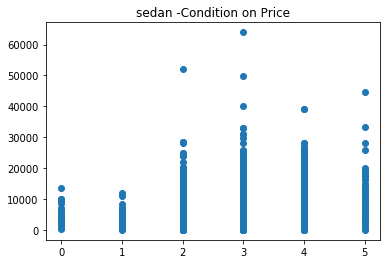

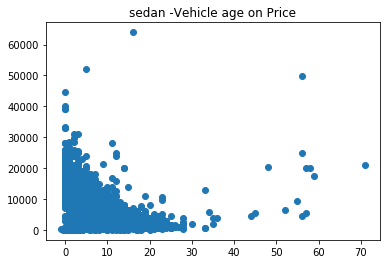

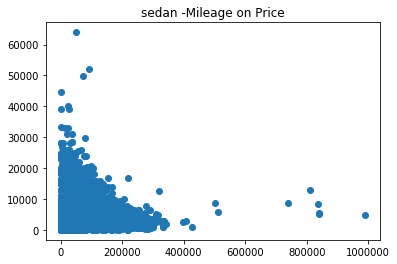

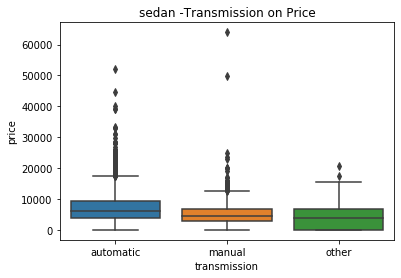

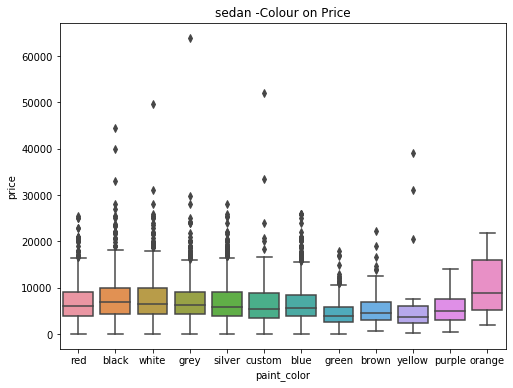

Checking there is at least 50 ads for truck :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12353 entries, 22 to 51505
Data columns (total 15 columns):
price               12353 non-null int64
model_year          11902 non-null float64
model               12353 non-null object
condition           12353 non-null int64
cylinders           12351 non-null float64
fuel                12353 non-null object
odometer            12233 non-null float64
transmission        12353 non-null object
type                12353 non-null object
paint_color         10218 non-null object
is_4wd              12353 non-null object
date_posted         12353 non-null object
days_listed         12353 non-null int64
vehicle_age         11902 non-null float64
mileage_per_year    12353 non-null Int64
dtypes: Int64(1), float64(4), int64(3), object(7)
memory usage: 1.5+ MB


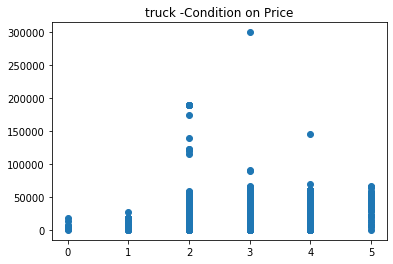

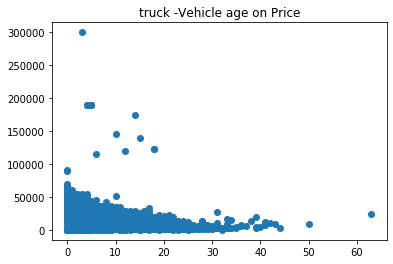

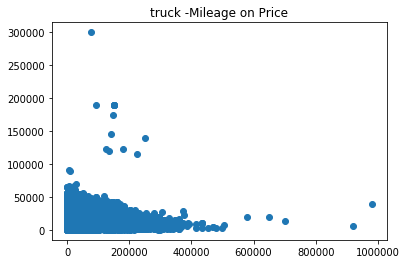

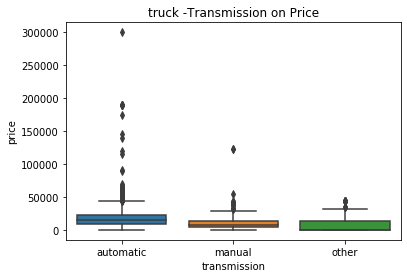

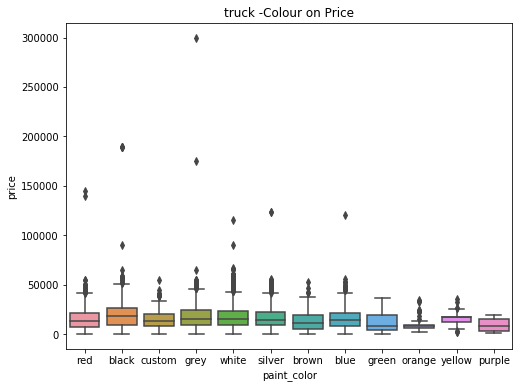

In [8]:
def factors(types):
    he = vehicles[vehicles['type']== types]
    print("Checking there is at least 50 ads for "+types+ " :\n")
    he.info()
    plt.scatter(x=he['condition'], y=he['price'])
    plt.title(types+ ' -Condition on Price')
    plt.show()
    plt.scatter(x=he['vehicle_age'], y= he['price'])
    plt.title(types + ' -Vehicle age on Price')
    plt.show()
    plt.scatter(x= he['odometer'],y= he['price'])
    plt.title(types + ' -Mileage on Price')
    plt.show()
    sns.boxplot(x = he['transmission'], y = he['price'])
    plt.title(types + ' -Transmission on Price')
    plt.show()
    plt.figure(figsize=(8,6))
    sns.boxplot(x=he['paint_color'], y=he['price'])
    plt.title(types + ' -Colour on Price')
    plt.show()
factors('SUV')
factors('sedan')
factors('truck')

## Conclusion
From the most popular types, it seems that price is dependent on condition. Condition three typically results in a higher price for all. Also age and mileage of the vehicle for all types, affects price. The lesser and age and mileage, the lower the price of the car. Price is also slightly influenced by transmission type. Vehicles with an automatic transmission usually have a higher price

### Final conclusion <a class="anchor" id="Final"></a>
To conclude, the price of a vehicle is influenced by many factors. Firstly, the negative correlation between price and number ads highlights that price is contingent on the number of ads. The more ads the lower the price, this is probably due to sellers trying to undercut each other in order to sell the car faster. However price is also influenced by condition and transmission type, those which are deemed 'excellent' and on automatic transmission. Although the use of the word 'excellent' to describe a condition type 3 car could be seen as misleading, suggesting a higher quality than it actually is. A better phrase would be 'very good'. Finally, the typical factors like age and mileage influence the price of a vehicle.